<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras API Project Exercise

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

## NOTE: Do not download the full zip from the link! We provide a special version of this file that has some extra feature engineering for you to do. You won't be able to follow along with the original file!

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

* A line of credit is a preset amount of money that a bank or credit union has agreed to lend you.

In [26]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  2


In [27]:
# tf.debugging.set_log_device_placement(True)
# with tf.device('/GPU:0'):

## Starter Code

#### Note: We also provide feature information on the data as a .csv file for easy lookup throughout the notebook:

In [28]:
import pandas as pd

In [29]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [30]:
data_info.head()

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


In [31]:
print(data_info.loc['revol_util'])

Description    Revolving line utilization rate, or the amount...
Name: revol_util, dtype: object


In [32]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [33]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [34]:
def feat_info_return(col_name):
    return data_info.loc[col_name]['Description']

In [35]:
feat_info('mort_acc')

Number of mortgage accounts.


In [36]:
index_data_info = list(data_info.index)
type(index_data_info)

list

In [37]:
for x in index_data_info:
    print(f"* Description : {x} - " )
    feat_info(x)
    print('\n')

* Description : loan_amnt - 
The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


* Description : term - 
The number of payments on the loan. Values are in months and can be either 36 or 60.


* Description : int_rate - 
Interest Rate on the loan


* Description : installment - 
The monthly payment owed by the borrower if the loan originates.


* Description : grade - 
LC assigned loan grade


* Description : sub_grade - 
LC assigned loan subgrade


* Description : emp_title - 
The job title supplied by the Borrower when applying for the loan.*


* Description : emp_length - 
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


* Description : home_ownership - 
The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT,

In [38]:
 [print("* "+ x + " : ", feat_info_return(x) + "\n") for x in index_data_info]

* loan_amnt :  The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

* term :  The number of payments on the loan. Values are in months and can be either 36 or 60.

* int_rate :  Interest Rate on the loan

* installment :  The monthly payment owed by the borrower if the loan originates.

* grade :  LC assigned loan grade

* sub_grade :  LC assigned loan subgrade

* emp_title :  The job title supplied by the Borrower when applying for the loan.*

* emp_length :  Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

* home_ownership :  The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER

* annual_inc :  The self-reported annual income provided by the borrower during registration.

* verification_s

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

## Loading the data and other imports

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [40]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [42]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


# Project Tasks

**Complete the tasks below! Keep in mind is usually more than one way to complete the task! Enjoy**

-----
------

# Section 1: Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**


----

**TASK: Since we will be attempting to predict loan_status, create a countplot as shown below.**

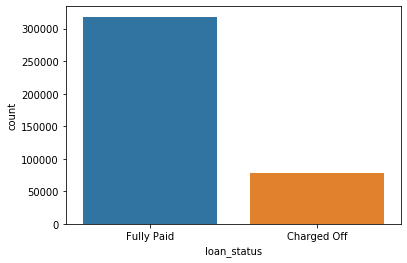

In [43]:
# CODE HERE
sns.countplot(x="loan_status", data=df)

In [44]:
df["loan_status"].value_counts() 
#.sort_values()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

**TASK: Create a histogram of the loan_amnt column.**

(0, 45000)

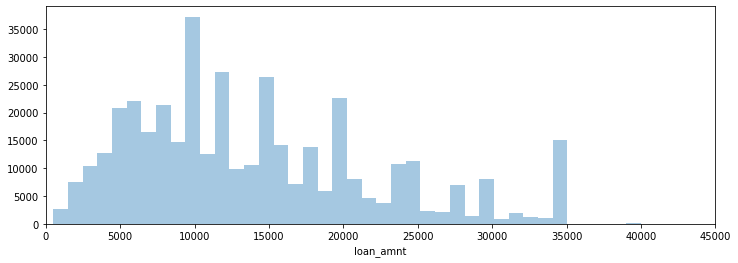

In [45]:
# CODE HERE
plt.figure(figsize=(12,4))
sns.distplot(df["loan_amnt"], kde=False, bins=40)
plt.xlim(0,45000)

**TASK: Let's explore correlation between the continuous feature variables. Calculate the correlation between all continuous numeric variables using .corr() method.**

In [46]:
# CODE HERE
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


**TASK: Visualize this using a heatmap. Depending on your version of matplotlib, you may need to manually adjust the heatmap.**

* [Heatmap info](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)
* [Help with resizing](https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot)

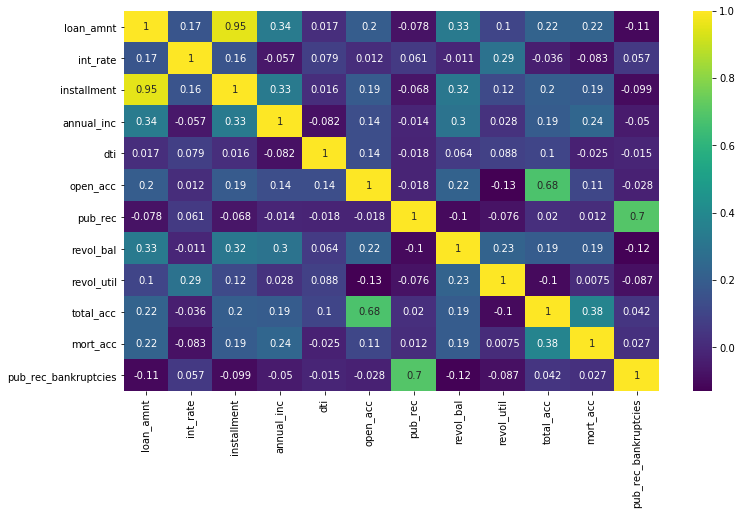

In [47]:
# CODE HERE , cmap="YlGnBu"
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),  annot=True, cmap="viridis")


(5, 0)

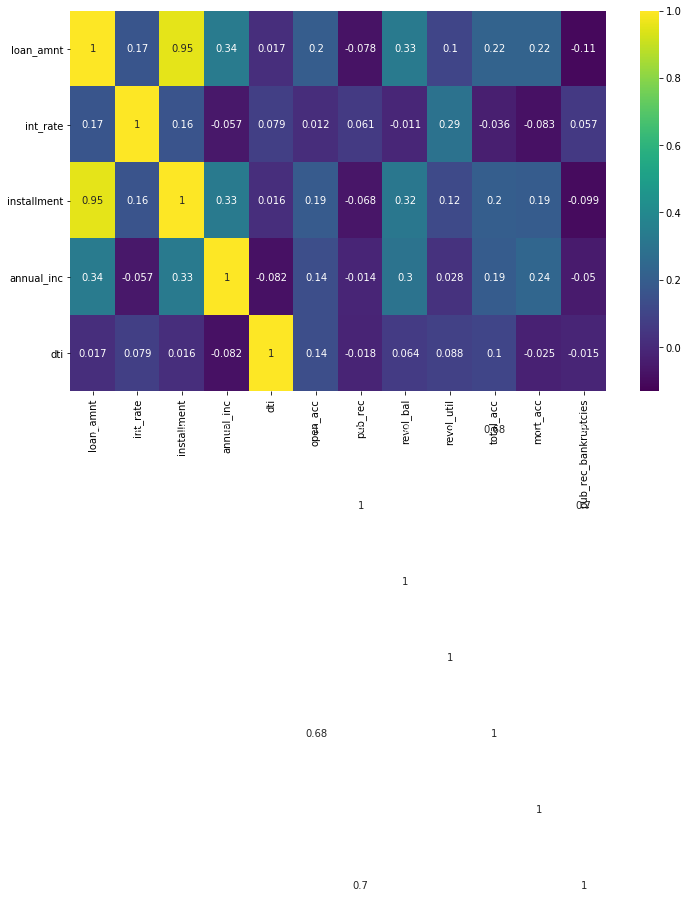

In [48]:
# CODE HERE , cmap="YlGnBu"
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),  annot=True, cmap="viridis")
plt.ylim(5, 0)   #set limit bottom, top

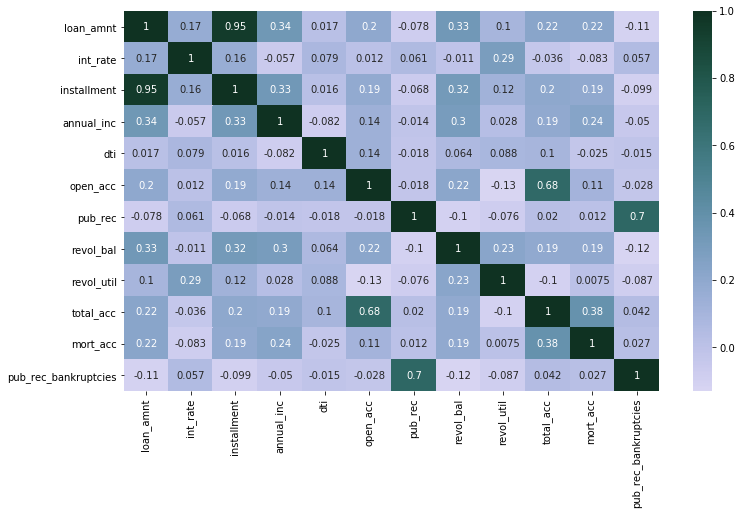

In [49]:
# CODE HERE , cmap="YlGnBu"
import matplotlib.pyplot as plt
import seaborn as sns
mypalette3 = sns.cubehelix_palette(n_colors=6, start=5, rot=0.4, gamma=1.0, hue=0.8, light=0.85, dark=0.15, reverse=False, as_cmap=True)

plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),  annot=True, cmap=mypalette3)


(12, 0)

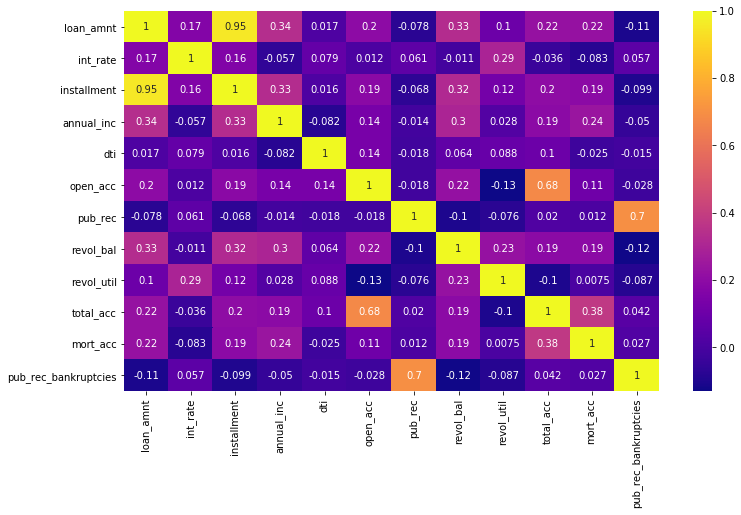

In [50]:
# CODE HERE , cmap="YlGnBu"
plt.figure(figsize=(12,7))
# sns.heatmap(df.corr(),  annot=True, cmap="viridis") 
# sns.heatmap(df.corr(),  annot=True, cmap="magma") 
# sns.heatmap(df.corr(),  annot=True, cmap="inferno") 
sns.heatmap(df.corr(),  annot=True, cmap="plasma") 

plt.ylim(12, 0)   #set limit bottom, top
# plt.ylim(10, 0) 

**TASK: You should have noticed almost perfect correlation with the "installment" feature. Explore this feature further. Print out their descriptions and perform a scatterplot between them. Does this relationship make sense to you? Do you think there is duplicate information here?**

In [51]:
# CODE HERE
df['installment'].describe()

count    396030.000000
mean        431.849698
std         250.727790
min          16.080000
25%         250.330000
50%         375.430000
75%         567.300000
max        1533.810000
Name: installment, dtype: float64

In [52]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [53]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


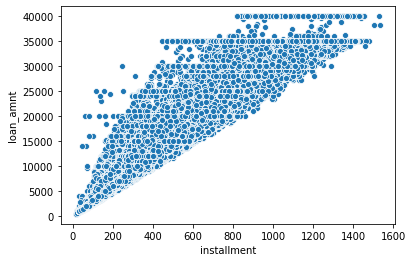

In [54]:
sns.scatterplot(x='installment', y='loan_amnt', data=df)

**TASK: Create a boxplot showing the relationship between the loan_status and the Loan Amount.**

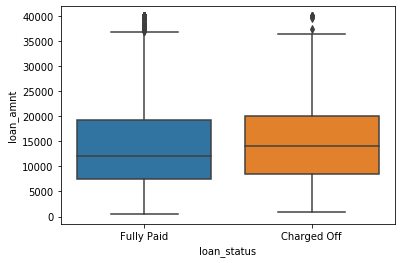

In [55]:
# CODE HERE
sns.boxplot(x="loan_status", y="loan_amnt", data=df)

In [56]:
df.groupby("loan_status")['loan_amnt'].mean()
# df.groupby("loan_status").mean()['loan_amnt']#same

loan_status
Charged Off    15126.300967
Fully Paid     13866.878771
Name: loan_amnt, dtype: float64

**TASK: Calculate the summary statistics for the loan amount, grouped by the loan_status.**

In [57]:
# CODE HERE
# charged off: the declaration by a creditor that an amount of debt is unlikely to be collected. 
df.groupby("loan_status")['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**TASK: Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?**

In [58]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [59]:
list(df['grade'].unique())

['B', 'A', 'C', 'E', 'D', 'F', 'G']

In [60]:
# CODE HERE
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [61]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

**TASK: Create a countplot per grade. Set the hue to the loan_status label.**

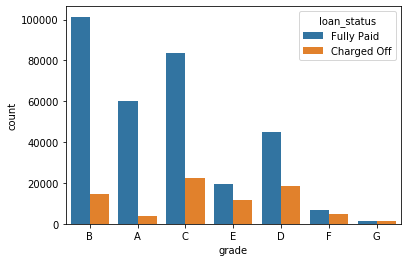

In [62]:
# CODE HERE
sns.countplot(x='grade', data=df, hue='loan_status')

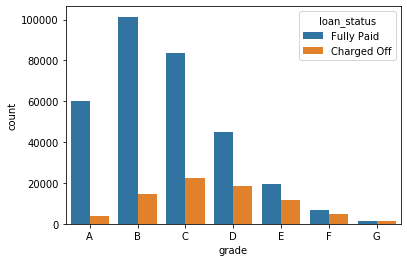

In [63]:
# CODE HERE 2
grade_order=['A','B','C','D','E','F','G']
sns.countplot(x='grade', data=df, order=grade_order, hue='loan_status')

['B' 'A' 'C' 'E' 'D' 'F' 'G']
['A', 'B', 'C', 'D', 'E', 'F', 'G']


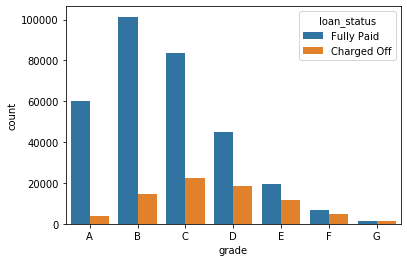

In [64]:
# CODE HERE 3
print(df['grade'].unique())
grade_order = sorted(df['grade'].unique())
print(grade_order)
sns.countplot(x='grade', data=df, order=grade_order, hue='loan_status')

In [65]:
status_grade_df = df.groupby('loan_status')['grade'].describe()
status_grade_df

,count,unique,top,freq
loan_status,,,,
Charged Off,77673,7,C,22449
Fully Paid,318357,7,B,101431


In [66]:
# #ValueError: ('Can only tuple-index with a MultiIndex', 'occurred at index Charged Off')
## Actually , Series, but treated it as DataFrame
# status_grade_df['ratio'] = status_grade_df.apply(lambda x : x[['Charged Off'],['count']]/x[['Fully Paid'],['count']][0], axis=1)

In [67]:
status_grade_df.index

Index(['Charged Off', 'Fully Paid'], dtype='object', name='loan_status')

In [68]:
status_grade_df[['count']][0:1]  #DataFrame

,count
loan_status,
Charged Off,77673


In [69]:
status_grade_df.loc[['Charged Off'],['count']] #DataFrame

,count
loan_status,
Charged Off,77673


In [70]:
status_grade_df.iloc[0]#DataFrame

count     77673
unique        7
top           C
freq      22449
Name: Charged Off, dtype: object

In [71]:
status_grade_df.at['Charged Off', 'count']

77673

In [73]:
status_grade_df.at['Charged Off', 'count']/status_grade_df.at['Fully Paid', 'count']

0.24398081399183935

In [74]:
ttl  = status_grade_df.at['Charged Off', 'count'] + status_grade_df.at['Fully Paid', 'count']
charged_off = status_grade_df.at['Charged Off', 'count'] / ttl
fully_paid =  status_grade_df.at['Fully Paid', 'count'] / ttl


In [75]:
status_grade_df['ratio'] = [charged_off, fully_paid]

In [76]:
status_grade_df

,count,unique,top,freq,ratio
loan_status,,,,,
Charged Off,77673,7,C,22449,0.196129
Fully Paid,318357,7,B,101431,0.803871


In [77]:
status_grade_df = status_grade_df.drop('ratio', axis=1)
status_grade_df

,count,unique,top,freq
loan_status,,,,
Charged Off,77673,7,C,22449
Fully Paid,318357,7,B,101431


In [78]:
# ### 
# status_grade_df['Charged Off ratio'] = status_grade_df.at['Charged Off', 'count']/( status_grade_df.at['Charged Off', 'count'] +status_grade_df.at['Fully Paid', 'count'])

In [79]:
# status_grade_df['Fully Paid ratio'] = status_grade_df.at['Fully Paid', 'count']/( status_grade_df.at['Fully Paid', 'count'] +status_grade_df.at['Fully Paid', 'count'])

In [80]:
# status_grade_df= status_grade_df.drop(['Charged Off ratio', 'Fully Paid ratio'], axis=1)

In [81]:
# status_grade_df

In [82]:
#test
status_grade_df[['count']]

,count
loan_status,
Charged Off,77673
Fully Paid,318357


In [85]:
ttl = len(df)
print(ttl)
print("ratio for Changed Off : ",status_grade_df.at['Charged Off', 'count']/ttl)
print("ratio for Fully Paid : ",status_grade_df.at['Fully Paid', 'count']/ttl)

# status_grade_df['ratio'] = status_grade_df[['count']][:]/ttl   #same as below
# status_grade_df['ratio'] = status_grade_df[['count']][0:2]/ttl
status_grade_df['ratio'] = status_grade_df[['count']]/ttl

status_grade_df

396030
ratio for Changed Off :  0.1961290811302174
ratio for Fully Paid :  0.8038709188697826


,count,unique,top,freq,ratio
loan_status,,,,,
Charged Off,77673,7,C,22449,0.196129
Fully Paid,318357,7,B,101431,0.803871


In [86]:
df.groupby('loan_status')['grade'].describe()['count']

loan_status
Charged Off     77673
Fully Paid     318357
Name: count, dtype: object

In [87]:
df.groupby('loan_status')['grade'].describe()[['count']]

,count
loan_status,
Charged Off,77673
Fully Paid,318357


In [88]:
df.groupby('loan_status')['grade'].describe()[['count']][0:1]  #DataFrame

,count
loan_status,
Charged Off,77673


In [89]:
a1 = df.groupby('loan_status')['grade'].describe().loc[['Charged Off'],['count']] #DataFrame
a1

,count
loan_status,
Charged Off,77673


In [90]:
a2 = df.groupby('loan_status')['grade'].describe().loc[['Fully Paid'],['count']] #DataFrame
a2

,count
loan_status,
Fully Paid,318357


**TASK: Display a count plot per subgrade. You may need to resize for this plot and [reorder](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) the x axis. Feel free to edit the color palette. Explore both all loans made per subgrade as well being separated based on the loan_status. After creating this plot, go ahead and create a similar plot, but set hue="loan_status"**

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


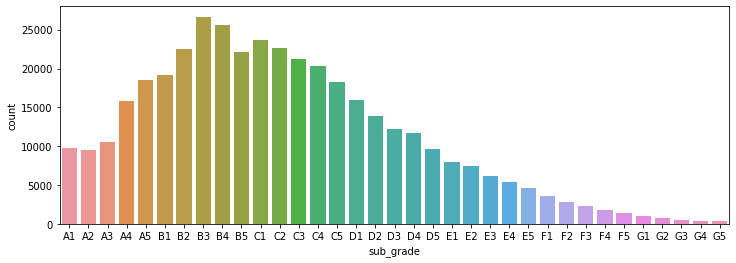

In [91]:
#CODE HERE
plt.figure(figsize=(12,4))
sorted_sub = sorted(df['sub_grade'].unique())
print(sorted_sub)
sns.countplot(x='sub_grade', order= sorted_sub, data=df)

[countplot palette](https://seaborn.pydata.org/generated/seaborn.countplot.html)

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


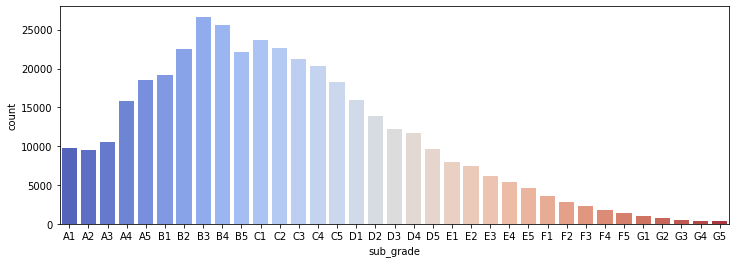

In [92]:
#CODE HERE
plt.figure(figsize=(12,4))
sorted_sub = sorted(df['sub_grade'].unique())
print(sorted_sub)

sns.countplot(x='sub_grade', order= sorted_sub, data=df, palette='coolwarm')

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


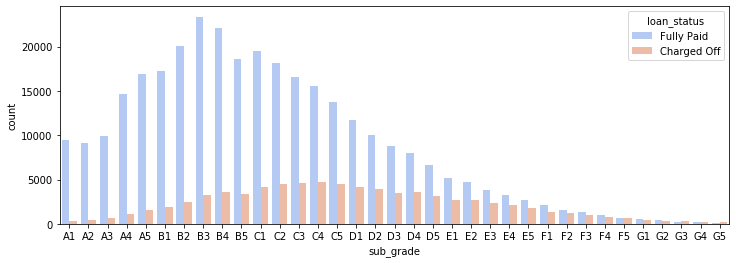

In [93]:
#CODE HERE
#CODE HERE
plt.figure(figsize=(12,4))
sorted_sub = sorted(df['sub_grade'].unique())
print(sorted_sub)

sns.countplot(x='sub_grade', order= sorted_sub, data=df, palette='coolwarm', hue='loan_status')


**TASK: It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.**

In [94]:
fg_sub = sorted_sub[-1:-11:-1]
fg_sub = sorted(fg_sub)
print(fg_sub)

fg_sub = ['F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']
fg_sub

['F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


['F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']

In [ ]:
# fg_sub = df[(df['grade']=='G') | (df['grade']=='F')] #same
# fg_sub = sorted(f_and_g['sub_grade'].unique())

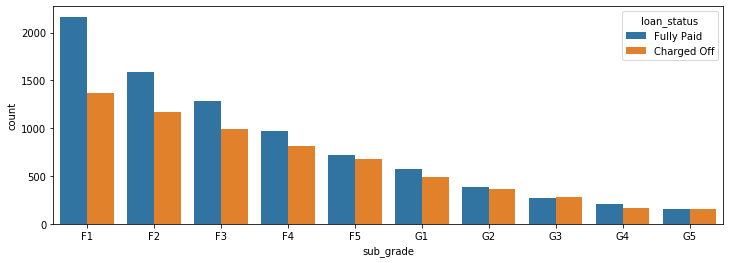

In [95]:
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade', order= fg_sub, data=df, hue='loan_status')

**TASK: Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [96]:
##df.map() ##
df['loan_status']

0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
396029     Fully Paid
Name: loan_status, Length: 396030, dtype: object

In [97]:
df['loan_repaid_map'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid_map
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [98]:
df = df.drop('loan_repaid_map', axis=1)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [99]:
# df = df.drop('loan_repaid', axis=1)
# df.head()

In [100]:
# CODE HERE ### df.apply(lambda x: .. #####
df['loan_repaid'] = df.apply(lambda x : 1 if x['loan_status'] == 'Fully Paid' else 0, axis=1)

In [69]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [70]:
df[df['loan_repaid'] == 1].shape[0]

318357

In [71]:
df[df['loan_repaid'] == 0].shape[0]

77673

In [72]:
new_df = df[['loan_repaid','loan_status']]
new_df

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


In [73]:
#solution 2 
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [74]:
##pd.map test
s = pd.Series(['cat', 'dog', np.nan, 'rabbit'])
print(s)
print("------------- after map({ key: value})------------")
s = s.map({'cat': 'Kitten', 'dog':'Puppy'})
s

0       cat
1       dog
2       NaN
3    rabbit
dtype: object
------------- after map({ key: value})------------


0    Kitten
1     Puppy
2       NaN
3       NaN
dtype: object

In [75]:
###################### df['column_name'].map({'column_element_value1':1, 'column_element_value2':2})###
# df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})


In [76]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


**CHALLENGE TASK: (Note this is hard, but can be done in one line!) Create a bar plot showing the correlation of the numeric features to the new loan_repaid column. [Helpful Link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)**

In [77]:
df.corr()['loan_repaid'].describe()

count    13.000000
mean      0.046503
std       0.297087
min      -0.247758
25%      -0.059836
50%      -0.019933
75%       0.017893
max       1.000000
Name: loan_repaid, dtype: float64

In [78]:
df.corr()['loan_repaid'] #all columns features correlation based on 'loan_repaid'

loan_amnt              -0.059836
int_rate               -0.247758
installment            -0.041082
annual_inc              0.053432
dti                    -0.062413
open_acc               -0.028012
pub_rec                -0.019933
revol_bal               0.010892
revol_util             -0.082373
total_acc               0.017893
mort_acc                0.073111
pub_rec_bankruptcies   -0.009383
loan_repaid             1.000000
Name: loan_repaid, dtype: float64

In [79]:
df.corr()['loan_repaid'].sort_values()

int_rate               -0.247758
revol_util             -0.082373
dti                    -0.062413
loan_amnt              -0.059836
installment            -0.041082
open_acc               -0.028012
pub_rec                -0.019933
pub_rec_bankruptcies   -0.009383
revol_bal               0.010892
total_acc               0.017893
annual_inc              0.053432
mort_acc                0.073111
loan_repaid             1.000000
Name: loan_repaid, dtype: float64

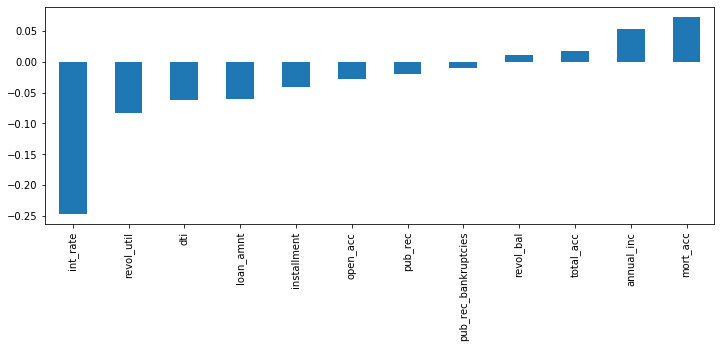

In [80]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar',figsize=(12,4))
# df.corr()['loan_repaid'].sort_values().plot(kind='bar',figsize=(12,4))

---
---
# Section 2: Data PreProcessing

**Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



[remove fill missing data](https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/)

In [81]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


# Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

**TASK: What is the length of the dataframe?**

In [82]:
print(df.shape)
# CODE HERE
print(len(df))
print(df.shape[0])

(396030, 28)
396030
396030


**TASK: Create a Series that displays the total count of missing values per column.**

In [83]:
## test
df_test = pd.DataFrame({'age': [5, 6, np.NaN],
                    'born': [pd.NaT, pd.Timestamp('1939-05-27'),
                             pd.Timestamp('1940-04-25')],
                    'name': ['Alfred', 'Batman', ''],
                   'toy': [None, 'Batmobile', 'Joker']})
df_test

,age,born,name,toy
0,5.0,NaT,Alfred,None
1,6.0,1939-05-27,Batman,Batmobile
2,NaN,1940-04-25,,Joker


In [84]:
df_test.isnull() #Detect missing values. if missing(Nan), True

,age,born,name,toy
0,False,True,False,True
1,False,False,False,False
2,True,False,False,False


In [85]:
df_test.isna() #same as isnull()

,age,born,name,toy
0,False,True,False,True
1,False,False,False,False
2,True,False,False,False


In [86]:
df_test.isnull()

,age,born,name,toy
0,False,True,False,True
1,False,False,False,False
2,True,False,False,False


In [87]:
# CODE HERE
df.isnull() #Detect missing values. return True if Not NaN, False for NaN

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396026,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396027,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396028,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [88]:
print(type(df[df.isnull()])) #DataFrame
df[df.isnull()]

<class 'pandas.core.frame.DataFrame'>


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
396026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
396027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
396028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
print(type(df.isnull())) #Series
df.isnull()

<class 'pandas.core.frame.DataFrame'>


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396026,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396027,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396028,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [90]:
print(type(df.isnull().sum())) #sum() =-> False is 0, True is 1. So sum() return sum of 1(True) in column
df.isnull().sum()

<class 'pandas.core.series.Series'>


loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**TASK: Convert this Series to be in term of percentage of the total DataFrame**

In [91]:
print(len(df))
df.shape[0]

396030


396030

In [92]:
# CODE HERE
(df.isnull().sum()/len(df)) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

**TASK: Let's examine emp_title and emp_length to see whether it will be okay to drop them. Print out their feature information using the feat_info() function from the top of this notebook.**

In [93]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [94]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


**TASK: How many unique employment job titles are there?**

In [95]:
# CODE HERE
len(df['emp_title'].unique())

173106

In [96]:
df['emp_title'].nunique()

173105

In [97]:
#Test value_counts()
index_value_counts = pd.Index([3, 1, 2, 3, 4, np.nan])

print(index_value_counts.value_counts())
print("-------Bins can be useful for going from a continuous variable to a categorical variable; ")
print("-------instead of counting unique apparitions of values---")
print("divide the index in the specified number of half-open bins.---------------------------")
print(index_value_counts.value_counts(bins=3))

3.0    2
4.0    1
2.0    1
1.0    1
dtype: int64
-------Bins can be useful for going from a continuous variable to a categorical variable; 
-------instead of counting unique apparitions of values---
divide the index in the specified number of half-open bins.---------------------------
(2.0, 3.0]      2
(0.996, 2.0]    2
(3.0, 4.0]      1
dtype: int64


In [98]:
#Series.value_counts() :Return a Series containing counts of unique values.
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
MODOT                         1
Maimtenance Electrician       1
Surface operator              1
Interdigital                  1
Design Team Memeber           1
Name: emp_title, Length: 173105, dtype: int64

####  **TASK: Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.**

In [99]:
df['emp_title']

0                        Marketing
1                  Credit analyst 
2                     Statistician
3                  Client Advocate
4          Destiny Management Inc.
                    ...           
396025            licensed bankere
396026                       Agent
396027                City Carrier
396028        Gracon Services, Inc
396029    Internal Revenue Service
Name: emp_title, Length: 396030, dtype: object

In [100]:
# # CODE HERE
df = df.drop('emp_title', axis=1) #aleady remove 'emp_title'
print('emp_title' in df)

False


**TASK: Create a count plot of the emp_length feature column. Challenge: Sort the order of the values.**

In [101]:
df['emp_length']

0         10+ years
1           4 years
2          < 1 year
3           6 years
4           9 years
            ...    
396025      2 years
396026      5 years
396027    10+ years
396028    10+ years
396029    10+ years
Name: emp_length, Length: 396030, dtype: object

In [102]:
#### .dropna() : drop NaN ####
df['emp_length'].dropna() #Remove missing values.

0         10+ years
1           4 years
2          < 1 year
3           6 years
4           9 years
            ...    
396025      2 years
396026      5 years
396027    10+ years
396028    10+ years
396029    10+ years
Name: emp_length, Length: 377729, dtype: object

In [103]:
# CODE HERE
print(df['emp_length'].sort_values().shape)
unique_dropna_emplen = sorted(df['emp_length'].dropna().unique())
unique_dropna_emplen #list of modified emp_lenth 

(396030,)


['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']


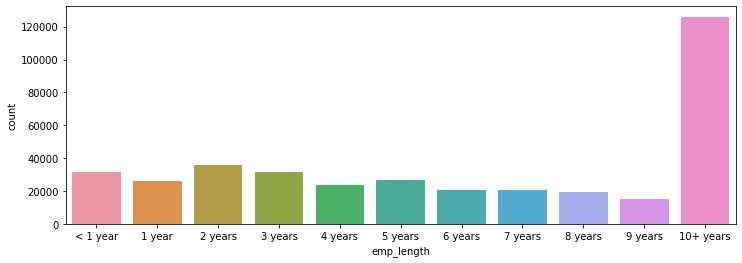

In [104]:
plt.figure(figsize=(12,4))
unique_dropna_emplen.remove('10+ years')
unique_dropna_emplen.remove('< 1 year')
unique_dropna_emplen.append('10+ years')
unique_dropna_emplen.insert(0,'< 1 year')
print(unique_dropna_emplen)
sns.countplot(x='emp_length', order = unique_dropna_emplen, data=df)

In [105]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

**TASK: Plot out the countplot with a hue separating Fully Paid vs Charged Off**

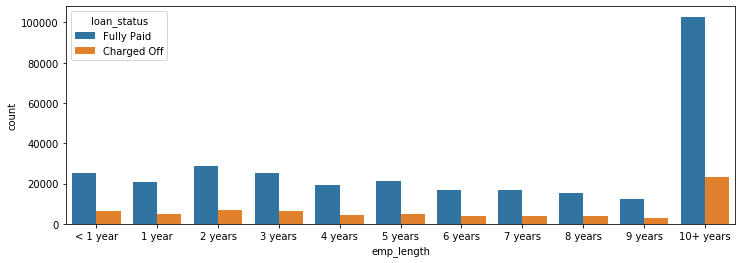

In [106]:
plt.figure(figsize=(12,4))
# CODE HERE
sns.countplot(x='emp_length', order = unique_dropna_emplen, hue='loan_status', data=df)

**CHALLENGE TASK: This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. There are a multitude of ways to create this Series. Once you've created it, see if visualize it with a [bar plot](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html). This may be tricky, refer to solutions if you get stuck on creating this Series.**

In [107]:
# CODE HERE
# relationship 'emp_length' vs. 'Charged Off' in 'loan_status'


df[df['loan_status']=="Charged Off"].head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0
25,6000.0,36 months,11.36,197.47,B,B5,2 years,RENT,46680.0,Not Verified,...,0.0,4370.0,40.1,10.0,f,INDIVIDUAL,NaN,0.0,"44130 Powers Course Suite 880\nEast Preston, A...",0
26,8400.0,36 months,13.35,284.45,C,C2,6 years,RENT,35000.0,Source Verified,...,0.0,6953.0,74.8,17.0,f,INDIVIDUAL,0.0,0.0,Unit 3166 Box 1862\nDPO AE 48052,0
36,3250.0,36 months,16.78,115.52,C,C5,NaN,RENT,22500.0,Verified,...,0.0,7587.0,54.6,7.0,f,INDIVIDUAL,0.0,0.0,"361 Erica Forest\nLake Mariaton, TN 30723",0
41,28000.0,60 months,19.91,312.04,E,E4,10+ years,RENT,52000.0,Verified,...,0.0,29178.0,87.6,16.0,f,INDIVIDUAL,NaN,0.0,"5836 Garcia Falls Apt. 525\nMatthewtown, CT 22690",0


In [108]:
df[df['loan_status']=="Charged Off"].groupby('emp_length')

In [109]:
 #frequency of each 'emp_length' who is 'Charged Off' 'loan_status'
df[df['loan_status']=="Charged Off"].groupby('emp_length').count() 

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
emp_length,,,,,,,,,,,,,,,,,,,,,
1 year,5154,5154,5154,5154,5154,5154,5154,5154,5154,5154,...,5154,5154,5148,5154,5154,5154,4732,5141,5154,5154
10+ years,23215,23215,23215,23215,23215,23215,23215,23215,23215,23215,...,23215,23215,23200,23215,23215,23215,21883,23198,23215,23215
2 years,6924,6924,6924,6924,6924,6924,6924,6924,6924,6924,...,6924,6924,6918,6924,6924,6924,6383,6916,6924,6924
3 years,6182,6182,6182,6182,6182,6182,6182,6182,6182,6182,...,6182,6182,6179,6182,6182,6182,5660,6179,6182,6182
4 years,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,...,4608,4608,4603,4608,4608,4608,4140,4598,4608,4608
5 years,5092,5092,5092,5092,5092,5092,5092,5092,5092,5092,...,5092,5092,5088,5092,5092,5092,4666,5090,5092,5092
6 years,3943,3943,3943,3943,3943,3943,3943,3943,3943,3943,...,3943,3943,3942,3943,3943,3943,3639,3940,3943,3943
7 years,4055,4055,4055,4055,4055,4055,4055,4055,4055,4055,...,4055,4055,4052,4055,4055,4055,3770,4052,4055,4055
8 years,3829,3829,3829,3829,3829,3829,3829,3829,3829,3829,...,3829,3829,3823,3829,3829,3829,3609,3826,3829,3829


In [110]:
df[df['loan_status']=="Charged Off"].groupby('emp_length').count()['loan_status'] 

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_status, dtype: int64

In [111]:
#Just for reference 
df['loan_status']

0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
396029     Fully Paid
Name: loan_status, Length: 396030, dtype: object

In [112]:
# df['loan_status'].groupby('emp_length').count() #Error since groupby is only for column of DataFrame or Series

In [113]:
df['loan_status'].count()

396030

In [114]:
#Just for reference 
df[df['loan_status']=='Fully Paid'].count()

loan_amnt               318357
term                    318357
int_rate                318357
installment             318357
grade                   318357
sub_grade               318357
emp_length              305094
home_ownership          318357
annual_inc              318357
verification_status     318357
issue_d                 318357
loan_status             318357
purpose                 318357
title                   316931
dti                     318357
earliest_cr_line        318357
open_acc                318357
pub_rec                 318357
revol_bal               318357
revol_util              318144
total_acc               318357
initial_list_status     318357
application_type        318357
mort_acc                286112
pub_rec_bankruptcies    317909
address                 318357
loan_repaid             318357
dtype: int64

In [115]:
emp_co = df[df['loan_status']=="Charged Off"].groupby('emp_length').count()['loan_status']

In [116]:
emp_fp = df[df['loan_status']=="Fully Paid"].groupby('emp_length').count()['loan_status']

In [117]:
emp_len = emp_co/emp_fp 
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

In [118]:
print(type(emp_len))
print(list(emp_len.index))

<class 'pandas.core.series.Series'>
['1 year', '10+ years', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '< 1 year']


In [119]:
emp_len_index = list(emp_len.index)
emp_len_index.remove('10+ years')
emp_len_index.append('10+ years')
emp_len_index.remove('< 1 year')
emp_len_index.insert(0,'< 1 year')
print("***",emp_len_index)
emp_len.index = emp_len_index #replace all index values 
emp_len

*** ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']


< 1 year     0.248649
1 year       0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
10+ years    0.260830
Name: loan_status, dtype: float64

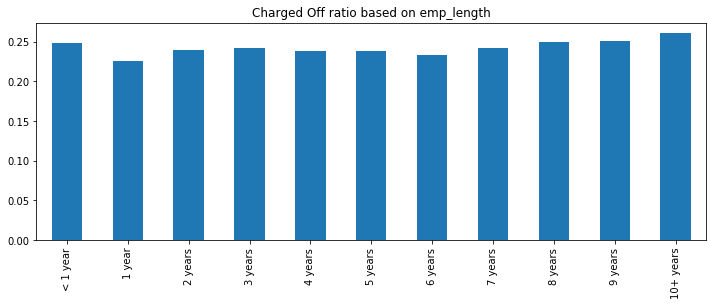

In [120]:
## make reference 
# df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar',figsize=(12,4))

##### DataFrame_operation.plot(kind='bar')#####
# emp_len.plot(kind='bar', order=unique_dropna_emplen, size=(12,4)) #AttributeError: 'Rectangle' object has no property 'order'
emp_len.plot(kind='bar', title='Charged Off ratio based on emp_length', figsize=(12,4)) #AttributeError: 'Rectangle' object has no property 'order'

**TASK: Charge off rates are extremely similar across all employment lengths. Go ahead and drop the emp_length column.**

In [121]:
# CODE HERE
# df.drop('emp_length', axis=1) # in df, still exists 'emp_length' column.  
df = df.drop('emp_length', axis=1) # in df, no 'emp_length' column.  
print('emp_length' in df.columns)
df.head()

False


,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


**TASK: Revisit the DataFrame to see what feature columns still have missing data.**

In [122]:
df.isnull()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396026,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396027,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396028,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [123]:
df.isnull().sum() #column-wise -> total number of missing data 

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**TASK: Review the title column vs the purpose column. Is this repeated information?**

In [124]:
# CODE HERE
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

In [125]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [126]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

**TASK: The title column is simply a string subcategory/description of the purpose column. Go ahead and drop the title column.**

In [127]:
# CODE HERE
df = df.drop('title', axis=1) #aleady excuted this line
print('title' in df.columns)
df.head()

False


,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


---
**NOTE: This is one of the hardest parts of the project! Refer to the solutions video if you need guidance, feel free to fill or drop the missing values of the mort_acc however you see fit! Here we're going with a very specific approach.**


---
**TASK: Find out what the mort_acc feature represents**

In [128]:
feat_info('total_acc')

The total number of credit lines currently in the borrower's credit file


In [129]:
# CODE HERE
feat_info('mort_acc')

Number of mortgage accounts.


**TASK: Create a value_counts of the mort_acc column.**

In [130]:
# CODE HERE
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

**TASK: There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! Let's review the other columsn to see which most highly correlates to mort_acc**

In [131]:
mor_ac_cor = df.corr()['mort_acc'].sort_values()
mor_ac_cor

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

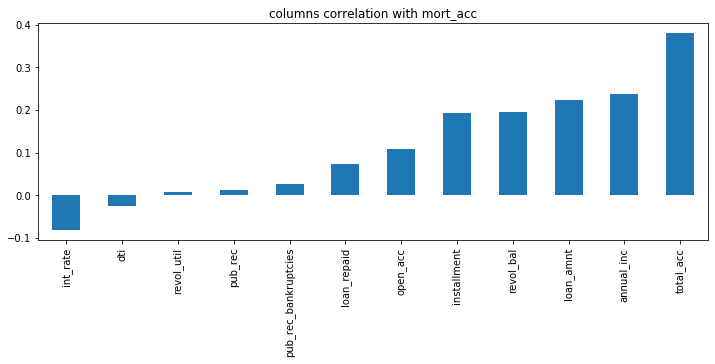

In [132]:
mor_ac_cor.sort_values().drop('mort_acc').plot(kind='bar', title="columns correlation with mort_acc", figsize=(12,4))

**TASK: Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:**

* total_acc :	The total number of credit lines currently in the borrower's credit file
* mort_acc :  Number of mortgage accounts.

In [133]:
#group the dataframe by the total_acc 
#Mean of mort_acc column per total_acc(groupby total_acc)
print("Mean of mort_acc column per total_acc(groupby total_acc)")
df.groupby('total_acc')['mort_acc'].mean()
# df.groupby('total_acc').mean()['mort_acc'] #same as above 

Mean of mort_acc column per total_acc(groupby total_acc)


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

**CHALLENGE TASK: Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. This involves using an .apply() method with two columns. Check out the link below for more info, or review the solutions video/notebook.**

[Helpful Link](https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe) 

In [134]:
print(df['mort_acc'].isnull().shape )
print(type(df['mort_acc'].isnull()) ) #Series
df['mort_acc'].isnull()  

(396030,)
<class 'pandas.core.series.Series'>


0         False
1         False
2         False
3         False
4         False
          ...  
396025    False
396026    False
396027    False
396028    False
396029     True
Name: mort_acc, Length: 396030, dtype: bool

In [135]:
df[df['mort_acc'].isnull()] #same as below

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
22,4200.0,36 months,6.99,129.67,A,A3,OWN,24000.0,Not Verified,Jun-2011,...,0.0,0.0,0.0,7.0,f,INDIVIDUAL,NaN,0.0,"54395 Melissa Walks\nJenniferbury, AL 05113",1
25,6000.0,36 months,11.36,197.47,B,B5,RENT,46680.0,Not Verified,Apr-2010,...,0.0,4370.0,40.1,10.0,f,INDIVIDUAL,NaN,0.0,"44130 Powers Course Suite 880\nEast Preston, A...",0
32,3000.0,36 months,6.03,91.31,A,A1,OWN,64000.0,Source Verified,Oct-2011,...,0.0,4912.0,13.4,18.0,f,INDIVIDUAL,NaN,0.0,"2722 Smith Branch Suite 131\nShaunbury, NH 22690",1
41,28000.0,60 months,19.91,312.04,E,E4,RENT,52000.0,Verified,Dec-2011,...,0.0,29178.0,87.6,16.0,f,INDIVIDUAL,NaN,0.0,"5836 Garcia Falls Apt. 525\nMatthewtown, CT 22690",0
62,5000.0,36 months,10.39,118.45,B,B4,RENT,66000.0,Not Verified,May-2008,...,0.0,15807.0,20.0,17.0,f,INDIVIDUAL,NaN,0.0,USS Goodman\nFPO AE 22690,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395991,5600.0,36 months,9.63,179.73,B,B1,RENT,54000.0,Verified,Mar-2011,...,0.0,2776.0,33.0,21.0,f,INDIVIDUAL,NaN,0.0,USNS Brewer\nFPO AA 29597,1
395995,10000.0,36 months,10.25,323.85,B,B2,RENT,55000.0,Not Verified,Apr-2010,...,0.0,5571.0,42.2,20.0,f,INDIVIDUAL,NaN,0.0,"PSC 0897, Box 0320\nAPO AP 22690",1
396016,3000.0,36 months,5.42,90.48,A,A1,MORTGAGE,70000.0,Source Verified,Aug-2011,...,0.0,4062.0,12.6,23.0,f,INDIVIDUAL,NaN,0.0,"2672 Jennifer River\nJoannemouth, AK 70466",1
396021,3200.0,36 months,5.42,96.52,A,A1,RENT,33000.0,Not Verified,Feb-2011,...,0.0,3985.0,7.6,50.0,f,INDIVIDUAL,NaN,0.0,"309 John Mission\nWest Marc, NY 00813",1


In [136]:
df[df['mort_acc'].isnull()==True] #DataFrame 

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
22,4200.0,36 months,6.99,129.67,A,A3,OWN,24000.0,Not Verified,Jun-2011,...,0.0,0.0,0.0,7.0,f,INDIVIDUAL,NaN,0.0,"54395 Melissa Walks\nJenniferbury, AL 05113",1
25,6000.0,36 months,11.36,197.47,B,B5,RENT,46680.0,Not Verified,Apr-2010,...,0.0,4370.0,40.1,10.0,f,INDIVIDUAL,NaN,0.0,"44130 Powers Course Suite 880\nEast Preston, A...",0
32,3000.0,36 months,6.03,91.31,A,A1,OWN,64000.0,Source Verified,Oct-2011,...,0.0,4912.0,13.4,18.0,f,INDIVIDUAL,NaN,0.0,"2722 Smith Branch Suite 131\nShaunbury, NH 22690",1
41,28000.0,60 months,19.91,312.04,E,E4,RENT,52000.0,Verified,Dec-2011,...,0.0,29178.0,87.6,16.0,f,INDIVIDUAL,NaN,0.0,"5836 Garcia Falls Apt. 525\nMatthewtown, CT 22690",0
62,5000.0,36 months,10.39,118.45,B,B4,RENT,66000.0,Not Verified,May-2008,...,0.0,15807.0,20.0,17.0,f,INDIVIDUAL,NaN,0.0,USS Goodman\nFPO AE 22690,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395991,5600.0,36 months,9.63,179.73,B,B1,RENT,54000.0,Verified,Mar-2011,...,0.0,2776.0,33.0,21.0,f,INDIVIDUAL,NaN,0.0,USNS Brewer\nFPO AA 29597,1
395995,10000.0,36 months,10.25,323.85,B,B2,RENT,55000.0,Not Verified,Apr-2010,...,0.0,5571.0,42.2,20.0,f,INDIVIDUAL,NaN,0.0,"PSC 0897, Box 0320\nAPO AP 22690",1
396016,3000.0,36 months,5.42,90.48,A,A1,MORTGAGE,70000.0,Source Verified,Aug-2011,...,0.0,4062.0,12.6,23.0,f,INDIVIDUAL,NaN,0.0,"2672 Jennifer River\nJoannemouth, AK 70466",1
396021,3200.0,36 months,5.42,96.52,A,A1,RENT,33000.0,Not Verified,Feb-2011,...,0.0,3985.0,7.6,50.0,f,INDIVIDUAL,NaN,0.0,"309 John Mission\nWest Marc, NY 00813",1


In [137]:
if any(df['mort_acc'].isnull()):
# if any(df['mort_acc'].isnan()):
    
# if df['mort_acc'].isnull(): #Error
    
    print(df['mort_acc'])
else:
    print("Ok.")

0         0.0
1         3.0
2         0.0
3         0.0
4         1.0
         ... 
396025    0.0
396026    1.0
396027    0.0
396028    5.0
396029    NaN
Name: mort_acc, Length: 396030, dtype: float64


In [138]:
df['mort_acc']

0         0.0
1         3.0
2         0.0
3         0.0
4         1.0
         ... 
396025    0.0
396026    1.0
396027    0.0
396028    5.0
396029    NaN
Name: mort_acc, Length: 396030, dtype: float64

[TypeError: 'float' object is not subscriptable](https://stackoverflow.com/questions/48257588/pandas-apply-typeerror-float-object-is-not-subscriptable)

[pandas lambda if else](https://datatofish.com/if-condition-in-pandas-dataframe/)

In [139]:
#test : groupby 
df_group1 = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot', 'Dolphin', 'Turtle'],
                   'Max Speed': [380., 370., 24., 26., 20., 5.],
                   'Weight': [30, 25, 15, 18, 100, 90],
                   'location':  ['sky','sky','cage','cage', 'sea', 'water' ]    
                         })
df_group1

,Animal,Max Speed,Weight,location
0,Falcon,380.0,30,sky
1,Falcon,370.0,25,sky
2,Parrot,24.0,15,cage
3,Parrot,26.0,18,cage
4,Dolphin,20.0,100,sea
5,Turtle,5.0,90,water


In [140]:
df_group1.groupby('Animal').mean()

,Max Speed,Weight
Animal,,
Dolphin,20.0,100.0
Falcon,375.0,27.5
Parrot,25.0,16.5
Turtle,5.0,90.0


In [141]:
df_group1.groupby('Animal').sum()

,Max Speed,Weight
Animal,,
Dolphin,20.0,100
Falcon,750.0,55
Parrot,50.0,33
Turtle,5.0,90


In [142]:
df_group1.groupby('Animal').mean()['Max Speed']

Animal
Dolphin     20.0
Falcon     375.0
Parrot      25.0
Turtle       5.0
Name: Max Speed, dtype: float64

In [143]:
df_group1.groupby('Animal')['Max Speed'].mean()

Animal
Dolphin     20.0
Falcon     375.0
Parrot      25.0
Turtle       5.0
Name: Max Speed, dtype: float64

In [144]:
########### solution ###########
## ['mort_acc'] value is the mean value corresponding to its total_acc value from the Series we created above: 
### -> df.groupby('total_acc').mean()['mort_acc']
df.groupby('total_acc').mean()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,loan_repaid
total_acc,,,,,,,,,,,,
2.0,6672.222222,15.801111,210.881667,64277.777778,2.279444,1.611111,0.000000,2860.166667,53.527778,0.000000,0.000000,0.777778
3.0,6042.966361,15.615566,198.728318,41270.753884,6.502813,2.611621,0.045872,3382.807339,49.991022,0.052023,0.015480,0.779817
4.0,7587.399031,15.069491,250.050194,42426.565969,8.411963,3.324717,0.041195,4874.231826,58.477400,0.066743,0.022951,0.785945
5.0,7845.734714,14.917564,256.190325,44394.098003,10.118328,3.921598,0.071499,5475.253452,56.890311,0.103289,0.041171,0.796844
6.0,8529.019843,14.651752,278.518228,48470.001156,11.222542,4.511119,0.104003,6546.374957,57.812483,0.151293,0.055077,0.784126
...,...,...,...,...,...,...,...,...,...,...,...,...
124.0,23200.000000,17.860000,587.370000,66000.000000,14.040000,43.000000,0.000000,25497.000000,75.400000,1.000000,0.000000,0.000000
129.0,25000.000000,7.890000,505.600000,200000.000000,8.900000,48.000000,0.000000,27659.000000,8.300000,1.000000,0.000000,1.000000
135.0,24000.000000,15.410000,576.140000,82000.000000,33.850000,57.000000,0.000000,35715.000000,50.800000,3.000000,0.000000,1.000000


In [145]:
print("Mean of mort_acc column per total_acc")
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']
print(type(total_acc_avg))
print("** index : ",total_acc_avg.index)
# print("* columns: ", total_acc_avg.columns) #AttributeError: 'Series' object has no attribute 'columns'
total_acc_avg

Mean of mort_acc column per total_acc
<class 'pandas.core.series.Series'>
** index :  Float64Index([  2.0,   3.0,   4.0,   5.0,   6.0,   7.0,   8.0,   9.0,  10.0,
               11.0,
              ...
              111.0, 115.0, 116.0, 117.0, 118.0, 124.0, 129.0, 135.0, 150.0,
              151.0],
             dtype='float64', name='total_acc', length=118)


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [146]:
total_index=[2.0,3.0,4.0,5.0,6.0]
for x in total_acc_avg[total_index]:
    print( '{:3.2}'.format(x))

0.0
0.052
0.067
0.1
0.15


In [147]:
print("Mean of mort_acc column per total_acc")
total_acc_avg  #Series consists of total_acc index -> total_acc_avg[df['total_acc']] return corresponding value

Mean of mort_acc column per total_acc


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [148]:
df['total_acc']

0         25.0
1         27.0
2         26.0
3         13.0
4         43.0
          ... 
396025    23.0
396026     8.0
396027    23.0
396028    20.0
396029    19.0
Name: total_acc, Length: 396030, dtype: float64

In [149]:
#test : 
print("* Mean of mort_acc column per total_acc -> mapping total_acc value to mort_acc value")
total_acc_avg[df['total_acc']] 

* Mean of mort_acc column per total_acc -> mapping total_acc value to mort_acc value


total_acc
25.0    1.900506
27.0    2.103573
26.0    1.987414
13.0    0.722124
43.0    2.997056
          ...   
23.0    1.721794
8.0     0.308422
23.0    1.721794
20.0    1.409380
19.0    1.358013
Name: mort_acc, Length: 396030, dtype: float64

In [150]:
# total_acc_avg is Series
df['mort_acc2'] = df.apply(lambda x : total_acc_avg[x['total_acc']] if np.isnan(x['mort_acc']) else x['mort_acc'], axis=1)

In [151]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid,mort_acc2
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1,0.0
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1,3.0
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1,0.0
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1,0.0
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0,1.0


In [152]:
df = df.drop('mort_acc2', axis=1)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [153]:
df['mort_acc'] = df.apply(lambda x : total_acc_avg[x['total_acc']] if np.isnan(x['mort_acc']) else x['mort_acc'], axis=1)

In [154]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [155]:
### option 2
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [156]:
df['mort_acc1'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [157]:
df  #mort_acc1 and mort_acc are same !!! 

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid,mort_acc1
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,36369.0,41.8,25.0,w,INDIVIDUAL,0.000000,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1,0.000000
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,20131.0,53.3,27.0,f,INDIVIDUAL,3.000000,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1,3.000000
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,11987.0,92.2,26.0,f,INDIVIDUAL,0.000000,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1,0.000000
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,5472.0,21.5,13.0,f,INDIVIDUAL,0.000000,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1,0.000000
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,24584.0,69.8,43.0,f,INDIVIDUAL,1.000000,0.0,"679 Luna Roads\nGreggshire, VA 11650",0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,RENT,40000.0,Source Verified,Oct-2015,...,1990.0,34.3,23.0,w,INDIVIDUAL,0.000000,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723",1,0.000000
396026,21000.0,36 months,12.29,700.42,C,C1,MORTGAGE,110000.0,Source Verified,Feb-2015,...,43263.0,95.7,8.0,f,INDIVIDUAL,1.000000,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA...",1,1.000000
396027,5000.0,36 months,9.99,161.32,B,B1,RENT,56500.0,Verified,Oct-2013,...,32704.0,66.9,23.0,f,INDIVIDUAL,0.000000,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466",1,0.000000
396028,21000.0,60 months,15.31,503.02,C,C2,MORTGAGE,64000.0,Verified,Aug-2012,...,15704.0,53.8,20.0,f,INDIVIDUAL,5.000000,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2...",1,5.000000


In [158]:
df = df.drop('mort_acc1', axis=1)
print('mort_acc1' in df.columns)

False


In [159]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

**TASK: revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Go ahead and remove the rows that are missing those values in those columns with dropna().**

In [160]:
### this is not proper solution. 
# df = df.drop('revol_util',  axis=1)
# df = df.drop('pub_rec_bankruptcies', axis=1)
# df.head()  

In [161]:
df = df.dropna() #Remove missing values.

In [162]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

[df.dropna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

In [163]:
## test : df.dropna()
df_dropna = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                    "toy": [np.nan, 'Batmobile', 'Bullwhip'],
                    "born": [pd.NaT, pd.Timestamp("1940-04-25"),
                             pd.NaT]})
df_dropna

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [164]:
df_dropna.dropna()

,name,toy,born
1,Batman,Batmobile,1940-04-25


## Categorical Variables and Dummy Variables

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**

**TASK: List all the columns that are currently non-numeric. [Helpful Link](https://stackoverflow.com/questions/22470690/get-list-of-pandas-dataframe-columns-based-on-data-type)**

[Another very useful method call](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)

In [165]:
# CODE HERE
#need to deal with the string values 
# To select all numeric types, use np.number or 'number'
# To select strings you must use the object dtype, but note that this will return all object dtype columns

df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [166]:
#test numer select 
df.select_dtypes(['number']).columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid'],
      dtype='object')

---
**Let's now go through all the string features to see what we should do with them.**

---


### term feature

**TASK: Convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().**

In [167]:
# CODE HERE
# df['term1'] = df['term'].apply(lambda x : int(x[:3]))

In [168]:
# df.head()

In [169]:
# df = df.drop('term1', axis=1)

In [170]:
df['term'] = df['term'].apply(lambda x : int(x[:3]))

In [171]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [172]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

### grade feature

**TASK: We already know grade is part of sub_grade, so just drop the grade feature.**

In [173]:
# CODE HERE
df = df.drop('grade',axis=1)

**TASK: Convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. Remember to drop the original subgrade column and to add drop_first=True to your get_dummies call.**

In [174]:
df['sub_grade']

0         B4
1         B5
2         B3
3         A2
4         C5
          ..
396025    B4
396026    C1
396027    B1
396028    C2
396029    C2
Name: sub_grade, Length: 395219, dtype: object

In [175]:
# CODE HERE
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [176]:
subgrade_dummies 

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
396026,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
396027,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [177]:
df = pd.concat([df.drop('sub_grade',axis=1), subgrade_dummies], axis=1)

In [178]:
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,...,0,0,0,0,0,0,0,0,0,0


In [179]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [180]:
df.select_dtypes('object').columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose 
**TASK: Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [181]:
# CODE HERE
# new_dummies = pd.get_dummies(df['verification_status', 'application_type','initial_list_status','purpose'], drop_first=True )#Error
new_dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']], drop_first=True )
new_dummies

,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
396026,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
396027,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
396028,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [182]:
df = pd.concat([df.drop(['verification_status', 'application_type','initial_list_status','purpose'], axis=1), new_dummies], axis=1)

In [183]:
df

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,36,11.44,329.48,RENT,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,RENT,40000.0,Oct-2015,Fully Paid,15.63,Nov-2004,...,0,0,0,0,0,0,0,0,0,0
396026,21000.0,36,12.29,700.42,MORTGAGE,110000.0,Feb-2015,Fully Paid,21.45,Feb-2006,...,0,0,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,RENT,56500.0,Oct-2013,Fully Paid,17.56,Mar-1997,...,0,0,0,0,0,0,0,0,0,0
396028,21000.0,60,15.31,503.02,MORTGAGE,64000.0,Aug-2012,Fully Paid,15.88,Nov-1990,...,0,0,0,0,0,0,0,0,0,0


### home_ownership
**TASK:Review the value_counts for the home_ownership column.**

In [184]:
#CODE HERE
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

**TASK: Convert these to dummy variables, but [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [185]:
#CODE HERE
df['home_ownership'] = df['home_ownership'].replace({'NONE':'OTHER', 'ANY':'OTHER'})
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [186]:
home_dummies = pd.get_dummies(df['home_ownership'], drop_first=True)
home_dummies

,OTHER,OWN,RENT
0,0,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,0,0,0
...,...,...,...
396025,0,0,1
396026,0,0,0
396027,0,0,1
396028,0,0,0


In [187]:

df = pd.concat([df.drop('home_ownership', axis=1), home_dummies], axis=1)
df

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,OTHER,OWN,RENT
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,...,0,0,0,0,0,1,0,0,0,1
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,...,0,0,0,0,0,0,0,0,0,1
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,...,0,0,0,0,0,0,0,0,0,1
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,40000.0,Oct-2015,Fully Paid,15.63,Nov-2004,6.0,...,0,0,0,0,0,0,0,0,0,1
396026,21000.0,36,12.29,700.42,110000.0,Feb-2015,Fully Paid,21.45,Feb-2006,6.0,...,0,0,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,56500.0,Oct-2013,Fully Paid,17.56,Mar-1997,15.0,...,0,0,0,0,0,0,0,0,0,1
396028,21000.0,60,15.31,503.02,64000.0,Aug-2012,Fully Paid,15.88,Nov-1990,9.0,...,0,0,0,0,0,0,0,0,0,0


### address
**TASK: Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.**

In [188]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [189]:
df['address'].shape

(395219,)

In [190]:
df['address'][0]

'0174 Michelle Gateway\nMendozaberg, OK 22690'

In [191]:
df['address'][0][-6:]

' 22690'

In [192]:
df['address'][1][-5:]

'05113'

In [193]:
df['address'][:][-5:]  #not as intended !!

396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, dtype: object

In [194]:
df['zip'] = df['address'].apply(lambda x : x[-5:])
df

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,OTHER,OWN,RENT,zip
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,...,0,0,0,0,1,0,0,0,1,22690
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,...,0,0,0,0,0,0,0,0,0,05113
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,...,0,0,0,0,0,0,0,0,1,05113
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,...,0,0,0,0,0,0,0,0,1,00813
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,...,0,0,0,0,0,0,0,0,0,11650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,40000.0,Oct-2015,Fully Paid,15.63,Nov-2004,6.0,...,0,0,0,0,0,0,0,0,1,30723
396026,21000.0,36,12.29,700.42,110000.0,Feb-2015,Fully Paid,21.45,Feb-2006,6.0,...,0,0,0,0,0,0,0,0,0,05113
396027,5000.0,36,9.99,161.32,56500.0,Oct-2013,Fully Paid,17.56,Mar-1997,15.0,...,0,0,0,0,0,0,0,0,1,70466
396028,21000.0,60,15.31,503.02,64000.0,Aug-2012,Fully Paid,15.88,Nov-1990,9.0,...,0,0,0,0,0,0,0,0,0,29597


**TASK: Now make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column.**

In [195]:
zip_dummies = pd.get_dummies(df['zip'], drop_first=True)
print(zip_dummies.shape)
zip_dummies

(395219, 9)


,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
396025,0,0,0,0,1,0,0,0,0
396026,1,0,0,0,0,0,0,0,0
396027,0,0,0,0,0,0,1,0,0
396028,0,0,0,1,0,0,0,0,0


In [196]:
df = pd.concat([df.drop(['zip','address'], axis=1), zip_dummies], axis=1)
df

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,...,1,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,...,1,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,...,1,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,40000.0,Oct-2015,Fully Paid,15.63,Nov-2004,6.0,...,1,0,0,0,0,1,0,0,0,0
396026,21000.0,36,12.29,700.42,110000.0,Feb-2015,Fully Paid,21.45,Feb-2006,6.0,...,0,1,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,56500.0,Oct-2013,Fully Paid,17.56,Mar-1997,15.0,...,1,0,0,0,0,0,0,1,0,0
396028,21000.0,60,15.31,503.02,64000.0,Aug-2012,Fully Paid,15.88,Nov-1990,9.0,...,0,0,0,0,1,0,0,0,0,0


### issue_d 

**TASK: This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.**

In [197]:
#CODE HERE

In [198]:
df = df.drop('issue_d', axis=1) # droped already !
print('issue_d' in df.columns)

False


### earliest_cr_line
**TASK: This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.**

In [199]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [200]:
#CODE HERE
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x : int(x[-4:]))
df

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,open_acc,pub_rec,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,10000.0,36,11.44,329.48,117000.0,Fully Paid,26.24,Jun-1990,16.0,0.0,...,0,0,1,0,0,0,0,0,0,1990
1,8000.0,36,11.99,265.68,65000.0,Fully Paid,22.05,Jul-2004,17.0,0.0,...,1,0,0,0,0,0,0,0,0,2004
2,15600.0,36,10.49,506.97,43057.0,Fully Paid,12.79,Aug-2007,13.0,0.0,...,1,0,0,0,0,0,0,0,0,2007
3,7200.0,36,6.49,220.65,54000.0,Fully Paid,2.60,Sep-2006,6.0,0.0,...,0,0,0,0,0,0,0,0,0,2006
4,24375.0,60,17.27,609.33,55000.0,Charged Off,33.95,Mar-1999,13.0,0.0,...,0,1,0,0,0,0,0,0,0,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,40000.0,Fully Paid,15.63,Nov-2004,6.0,0.0,...,0,0,0,0,1,0,0,0,0,2004
396026,21000.0,36,12.29,700.42,110000.0,Fully Paid,21.45,Feb-2006,6.0,0.0,...,1,0,0,0,0,0,0,0,0,2006
396027,5000.0,36,9.99,161.32,56500.0,Fully Paid,17.56,Mar-1997,15.0,0.0,...,0,0,0,0,0,0,1,0,0,1997
396028,21000.0,60,15.31,503.02,64000.0,Fully Paid,15.88,Nov-1990,9.0,0.0,...,0,0,0,1,0,0,0,0,0,1990


In [201]:
df = df.drop('earliest_cr_line', axis= 1)

In [202]:
df

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,10000.0,36,11.44,329.48,117000.0,Fully Paid,26.24,16.0,0.0,36369.0,...,0,0,1,0,0,0,0,0,0,1990
1,8000.0,36,11.99,265.68,65000.0,Fully Paid,22.05,17.0,0.0,20131.0,...,1,0,0,0,0,0,0,0,0,2004
2,15600.0,36,10.49,506.97,43057.0,Fully Paid,12.79,13.0,0.0,11987.0,...,1,0,0,0,0,0,0,0,0,2007
3,7200.0,36,6.49,220.65,54000.0,Fully Paid,2.60,6.0,0.0,5472.0,...,0,0,0,0,0,0,0,0,0,2006
4,24375.0,60,17.27,609.33,55000.0,Charged Off,33.95,13.0,0.0,24584.0,...,0,1,0,0,0,0,0,0,0,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,40000.0,Fully Paid,15.63,6.0,0.0,1990.0,...,0,0,0,0,1,0,0,0,0,2004
396026,21000.0,36,12.29,700.42,110000.0,Fully Paid,21.45,6.0,0.0,43263.0,...,1,0,0,0,0,0,0,0,0,2006
396027,5000.0,36,9.99,161.32,56500.0,Fully Paid,17.56,15.0,0.0,32704.0,...,0,0,0,0,0,0,1,0,0,1997
396028,21000.0,60,15.31,503.02,64000.0,Fully Paid,15.88,9.0,0.0,15704.0,...,0,0,0,1,0,0,0,0,0,1990


In [203]:
# convert it to a numeric feature.
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

## Train Test Split

**TASK: Import train_test_split from sklearn.**

In [204]:
from sklearn.model_selection import train_test_split

**TASK: drop the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.**

In [205]:
# CODE HERE
df = df.drop('loan_status',axis=1)

**TASK: Set X and y variables to the .values of the features and label.**

In [206]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT', '05113',
       '11650', '22690', '29597', '

In [207]:
df

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,10000.0,36,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,...,0,0,1,0,0,0,0,0,0,1990
1,8000.0,36,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,...,1,0,0,0,0,0,0,0,0,2004
2,15600.0,36,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,...,1,0,0,0,0,0,0,0,0,2007
3,7200.0,36,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,...,0,0,0,0,0,0,0,0,0,2006
4,24375.0,60,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,...,0,1,0,0,0,0,0,0,0,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,40000.0,15.63,6.0,0.0,1990.0,34.3,...,0,0,0,0,1,0,0,0,0,2004
396026,21000.0,36,12.29,700.42,110000.0,21.45,6.0,0.0,43263.0,95.7,...,1,0,0,0,0,0,0,0,0,2006
396027,5000.0,36,9.99,161.32,56500.0,17.56,15.0,0.0,32704.0,66.9,...,0,0,0,0,0,0,1,0,0,1997
396028,21000.0,60,15.31,503.02,64000.0,15.88,9.0,0.0,15704.0,53.8,...,0,0,0,1,0,0,0,0,0,1990


In [208]:
#CODE HERE
X = df.drop('loan_repaid', axis=1).values #ndarray
y = df['loan_repaid'].values #ndarray

In [209]:
print(X.shape)
print(y.shape)

(395219, 78)
(395219,)


----
----

# OPTIONAL

## Grabbing a Sample for Training Time

### OPTIONAL: Use .sample() to grab a sample of the 490k+ entries to save time on training. Highly recommended for lower RAM computers or if you are not using GPU.

----
----

In [210]:
# df = df.sample(frac=0.1,random_state=101)
print(len(df))

395219


**TASK: Perform a train/test split with test_size=0.2 and a random_state of 101.**

In [211]:
#CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [212]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(316175, 78) (79044, 78) (316175,) (79044,)


## Normalizing the Data

**TASK: Use a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data.**

In [213]:
# CODE HERE
from sklearn.preprocessing import MinMaxScaler

In [214]:
scaler = MinMaxScaler()

In [215]:
X_train = scaler.fit_transform(X_train)

In [216]:
X_test = scaler.transform(X_test)

# Creating the Model

**TASK: Run the cell below to import the necessary Keras functions.**

In [217]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [218]:
from tensorflow.keras.layers import Dropout

* A dense(fully connected neural network) layer is just a regular layer of neurons in a neural network. Each neuron recieves input from all the neurons in the previous layer, thus densely connected. The layer has a weight matrix W, a bias vector b, and the activations of previous layer a: 
    * ``output = activation(dot(input, kernel) + bias)``
    *  **activation** is the element-wise activation function passed as the activation argument, **kernel** is a weights matrix created by the layer, and **bias** is a bias vector created by the layer.
* units: Positive integer, dimensionality of the output space.
![dense](dense.png)

* A dropout layer is similar except that when the layer is used, the activations are set to zero for some random nodes. This is a way to prevent overfitting. (float between 0 and 1)
    * Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly. which helps prevent overfitting.
    * ``from keras.layers import Sequential
        model = Sequential()
        model.add(Dropout (0.2))
        model.add(Dense(10, activation = 'relu')``
![dropout](dropout.png)

```
# as first layer in a sequential model:
model = Sequential()

model.add(Dense(32, input_shape=(16,)))
# now the model will take as input arrays of shape (*, 16)
# and output arrays of shape (*, 32)

# after the first layer, you don't need to specify
# the size of the input anymore:
model.add(Dense(32))
```

[Dense layere(Non linear layer)](https://medium.com/datathings/dense-layers-explained-in-a-simple-way-62fe1db0ed75)

In general, they have the same formulas as the linear layers wx+b, but the end result is passed through a non-linear function called Activation function.
``y = f(w*x + b) #(Learn w, and b, with f linear or non-linear activation function)``

The “Deep” in deep-learning comes from the notion of increased complexity resulting by stacking several consecutive (hidden) non-linear layers. Here are some graphs of the most famous activation functions:
![activation](activation.png)

$$Taylor Series:
f(a) + \frac{f'(a)}{1!} (x-a) + \frac{f''(a)}{2!} (x-a)^{2} + \frac{f'''(a)}{3!} (x-a)^{3} + \ldots 
$$
Intuitively, each non linear activation function can be decomposed to Taylor series thus producing a polynomial of a degree higher than 1. By stacking several dense non-linear layers (one after the other) we can create higher and higher order of polynomials. For instance, let’s imagine we use the following non-linear activation function: (y=x²+x). By stacking 2 instances of it, we can generate a polynomial of degree 4, having (x⁴, x³, x², x) terms in it. Thus the more layers we add, the more complex mathematical functions we can model.

**TASK: Build a sequential model to will be trained on the data. You have unlimited options here, but here is what the solution uses: a model that goes 78 --> 39 --> 19--> 1 output neuron. OPTIONAL: Explore adding [Dropout layers](https://keras.io/layers/core/) [1](https://en.wikipedia.org/wiki/Dropout_(neural_networks)) [2](https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab)**

[how to choose hidden layers nodes](https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw)

In [219]:
from tensorflow.keras.callbacks import EarlyStopping

In [220]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [221]:
from tensorflow.keras.layers import Dropout

[number of layers/neurons](https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw)
*  The Input Layer : the number of neurons comprising that layer is equal to the number of features (columns) in your data.
* The Output Layer : 
    * If the NN is a regressor, then the output layer has a single node.(returns a value (e.g., price).)
    * If the NN is a classifier, then it also has a single node unless softmax is used in which case the output layer has one node per class label in your model.(returns a class label (e.g., "Premium Account"/"Basic Account"))
* The hidden Layer :


#### regression vs. classification
* output variable in regression is numerical (or continuous) 
    * with a dataset about houses, and you are asked to predict their prices, that is a regression task because price will be a continuous output.
    * linear regression, Support Vector Regression (SVR), and regression trees.
* output for classification is categorical (or discrete).
    * the houses will be classified whether their prices fall into two discrete categories: above or below the said price.
    * logistic regression, Naïve Bayes, decision trees, and K Nearest Neighbors.

In [222]:
# CODE HERE
model = Sequential()

# Choose whatever number of layers/neurons you want.

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

# Remember to compile()
model.add(Dense(units = 30, activation= 'relu')) 
model.add(Dropout(0.5))

model.add(Dense(units = 20, activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 10, activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [223]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Train on 316175 samples, validate on 79044 samples
Epoch 1/25
316175/316175 [==============================] - 6s 20us/sample - loss: 0.4155 - val_loss: 0.2731
Epoch 2/25
316175/316175 [==============================] - 5s 16us/sample - loss: 0.3002 - val_loss: 0.2673
Epoch 3/25
316175/316175 [==============================] - 5s 17us/sample - loss: 0.2862 - val_loss: 0.2658
Epoch 4/25
316175/316175 [==============================] - 5s 17us/sample - loss: 0.2823 - val_loss: 0.2658
Epoch 5/25
316175/316175 [==============================] - 5s 17us/sample - loss: 0.2804 - val_loss: 0.2664
Epoch 6/25
316175/316175 [==============================] - 5s 17us/sample - loss: 0.2794 - val_loss: 0.2658
Epoch 7/25
316175/316175 [==============================] - 5s 17us/sample - loss: 0.2789 - val_loss: 0.2651
Epoch 8/25
316175/316175 [==============================] - 5s 17us/sample - loss: 0.2782 - val_loss: 0.2664
Epoch 9/25
316175/316175 [==============================] - 5s 17us/sample - 

**TASK: Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Optional: add in a batch_size of 256.**

In [224]:
# CODE HERE
from tensorflow.keras.models import load_model

In [225]:
model.save('full_data_project_model.h5')  

**TASK: OPTIONAL: Save your model.**

In [226]:
# CODE HERE
losses = pd.DataFrame(model.history.history)

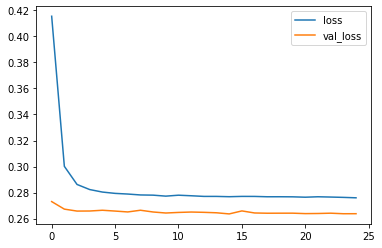

In [227]:
losses[['loss','val_loss']].plot()

### original Dense Neurons:  a model that goes 78 --> 39 --> 19--> 1 output neuron.


In [228]:
# CODE HERE
model2 = Sequential()

# Choose whatever number of layers/neurons you want.

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

# Remember to compile()
model2.add(Dense(units = 78, activation= 'relu')) 
model2.add(Dropout(0.5))

model2.add(Dense(units = 39, activation= 'relu'))
model2.add(Dropout(0.5))

model2.add(Dense(units = 19, activation= 'relu'))
model2.add(Dropout(0.5))

model2.add(Dense(units=1,activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model2.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Train on 316175 samples, validate on 79044 samples
Epoch 1/25
316175/316175 [==============================] - 6s 18us/sample - loss: 0.3375 - val_loss: 0.2664
Epoch 2/25
316175/316175 [==============================] - 5s 16us/sample - loss: 0.2737 - val_loss: 0.2642
Epoch 3/25
316175/316175 [==============================] - 5s 17us/sample - loss: 0.2693 - val_loss: 0.2643
Epoch 4/25
316175/316175 [==============================] - 5s 17us/sample - loss: 0.2669 - val_loss: 0.2638
Epoch 5/25
316175/316175 [==============================] - 5s 16us/sample - loss: 0.2657 - val_loss: 0.2637
Epoch 6/25
316175/316175 [==============================] - 5s 17us/sample - loss: 0.2651 - val_loss: 0.2635
Epoch 7/25
316175/316175 [==============================] - 5s 17us/sample - loss: 0.2647 - val_loss: 0.2632
Epoch 8/25
316175/316175 [==============================] - 5s 17us/sample - loss: 0.2642 - val_loss: 0.2630
Epoch 9/25
316175/316175 [==============================] - 5s 17us/sample - 

In [ ]:
# from tensorflow.keras.models import load_model
model2.save('full_data_project_model2.h5')  

In [ ]:
losses2 = pd.DataFrame(model2.history.history)

In [ ]:
losses2[['loss','val_loss']].plot()

# Section 3: Evaluating Model Performance.

**TASK: Plot out the validation loss versus the training loss.**

In [ ]:
# CODE HERE
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
X_test.shape

In [ ]:
predictions = model.predict_classes(X_test)

In [ ]:
print(classification_report(y_test,predictions)) #(79044, 78)

In [ ]:
confusion_matrix(y_test,predictions)

In [ ]:
#model2 precittion
from sklearn.metrics import classification_report,confusion_matrix
predictions2 = model2.predict_classes(X_test)

In [ ]:
print(classification_report(y_test,predictions2))

**TASK: Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

In [ ]:
# CODE HERE
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

In [ ]:
print(new_customer.values.shape) #(78,) 
new_customer.values

In [ ]:
model.predict_classes(new_customer.values.reshape(1,78)) #(78,) -> (1,78)

**TASK: Given the customer below, would you offer this person a loan?**

In [ ]:
import random
random.seed(101)
random_ind2 = random.randint(0,len(df))
print(random_ind2)
print(f"-------------customer2 with index {random_ind2}--------------------")
print(f"-Actual loan payid ?------ df.iloc[{random_ind2}]['loan_repaid']----")
print(df.iloc[[random_ind2]]['loan_repaid']) #1 for yes, actually loan paid !!
df.iloc[random_ind2]

In [ ]:
new_customer2 = df.drop('loan_repaid',axis=1).iloc[random_ind2]
new_customer2

In [ ]:
#predict for loan payment for radomly selected customer
print(f"predict for loan payment for radomly selected customer2 index {random_ind}")
result  = model2.predict_classes(new_customer2.values.reshape(1,78)) 
print(result)
print(result[0][0])
myresult = ["Yes I'd offer a loan to the customer" if result[0][0] == 1 else " No I would not offer a loan to the customer" for result[0][0] in result]
print(myresult[0])

In [ ]:
# CODE HERE

**TASK: Now check, did this person actually end up paying back their loan?**

In [ ]:
# CODE HERE
df.iloc[random_ind]['loan_repaid']

# GREAT JOB!